In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sks
import tensorflow as tf

In [3]:
dataset=pd.read_csv('tabular-playground/train.csv',index_col='id')
dataset.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
dataset.isna().sum()

cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
target    0
dtype: int64

importing keras from tensorflow
spit dataset into train and test set

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [6]:
dataset.columns

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'target'],
      dtype='object')

In [7]:
Y=dataset['target'].to_numpy()
dataset.drop('target',axis=1,inplace=True)


In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset, Y, test_size=0.33, random_state=0)

In [71]:
xtrain.shape

(201000, 14)

In [97]:
model=keras.Sequential([
    layers.Dropout(0.3),
    layers.Dense(1,input_shape=[xtrain.shape[1]]),
#     layers.Dense(1)
])

In [98]:
opt=keras.optimizers.SGD(lr=0.01)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
)

In [99]:
history=model.fit(
    xtrain,ytrain,
    validation_data=(xtest,ytest),
    epochs=30,
    verbose=0,
    batch_size=20000,
)

In [100]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [101]:
#Minimum Validation Loss: 0.5256,0.01,SGD,mse

Minimum Validation Loss: 0.1369


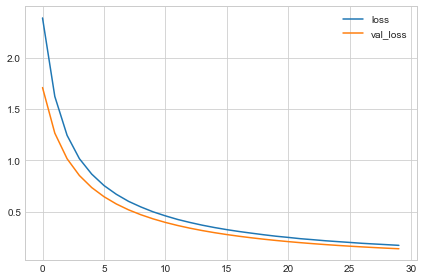

In [102]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [44]:
datatest=pd.read_csv('tabular-playground/test.csv',index_col='id')
datatest.head()
datatest.shape

(200000, 14)

In [45]:
predictions=model.predict(datatest,verbose=0)
predictions

array([[4.834356 , 4.842642 , 4.9282236, ..., 4.7638326, 4.866808 ,
        4.8920245],
       [5.7402506, 5.6706986, 5.778567 , ..., 5.7791247, 5.7371244,
        5.5225825],
       [4.0189137, 4.1886625, 4.2388673, ..., 4.426879 , 4.2383943,
        4.4141555],
       ...,
       [4.6080174, 4.426837 , 4.378373 , ..., 4.292924 , 4.4974823,
        4.400259 ],
       [4.5976934, 4.603797 , 4.3599377, ..., 4.505815 , 4.184929 ,
        4.6081424],
       [5.7364683, 5.593657 , 5.7379503, ..., 5.769397 , 5.6797695,
        5.6269426]], dtype=float32)

In [46]:
predictions.shape

(200000, 10)

In [47]:
predictions.shape

(200000, 10)

In [48]:
answer=pd.DataFrame({'id':datatest.index,'target':predictions.T[0]})
answer.to_csv(path_or_buf='answers1.csv',index=False)